In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import netCDF4 as nc
import matplotlib
from netCDF4 import Dataset
#from mpl_toolkits.basemap import Basemap
#import seaborn as sns
#import iris
#import iris.coord_categorisation
#import iris.quickplot as qplt

In [25]:
#import xarray as xr
#import numpy as np
#import iris.coord_categorisation
#import iris.quickplot as qplt
#wnd = nc.Dataset('wrf-chem-prefire-uv.nc')
wnd = nc.Dataset('ERA-1000-fire.nc')
temp = nc.Dataset('ERA-fire-t2.nc')
#temp = nc.Dataset('wrf-chem-prefire-t2.nc')
#v_wnd = xr.open_dataset('vwnd.10m.gauss.2021.nc')
wnd
#temp

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    CDI: Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Fri Jun 04 21:08:49 2021: cdo remapbil,global_1 era-fire-surface-wind.nc tsetsurfacewind-era.nc
Fri Jun 04 18:34:34 2021: cdo timmean fire-surface-wind.nc era-fire-surface-wind.nc
Fri Jun 04 18:32:34 2021: cdo seltimestep,1297/1512 era-wind-surface.nc fire-surface-wind.nc
Fri Jun  4 18:29:06 2021: ncpdq --unpack era-wind-1000.nc era-wind-surface.nc
2021-06-01 13:01:45 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data7/adaptor.mars.internal-1622552305.2816858-25403-12-de2206d9-186e-48fe-8be2-0a187e4eb137.nc /cache/tmp/de2206d9-186e-48fe-8be2-0a187e4eb137-adaptor.mars.internal-1622552305.2826068-25403-2-tmp.grib
    NCO: "4.5.4"
    nco_openmp_thread_number: 1
    CDO: Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/cdo)
    dimen

In [30]:
for var in wnd.variables:
    print(var)
for var in temp.variables:
   print(var)

lon
lat
time
time_bnds
u
v
lon
lat
time
time_bnds
t2m


In [7]:
#lats = temp.variables["XLAT"][:,0]
#lons = temp.variables["XLONG"][0,:]
#lon, lat = np.meshgrid(lons, lats)
#lons

In [27]:
lats = temp.variables["lat"][:]
lons = temp.variables["lon"][:]
lon, lat = np.meshgrid(lons, lats)
#lon,lat = np.meshgrid(lons,lats)
#lats.shape

In [31]:
u_wind = wnd.variables["u"][0]#[1]
v_wind = wnd.variables["v"][0]
t2 = temp.variables['t2m'][0]
t2 = t2 -273.15 #covert kelvin to celc

In [28]:
#u_wind = wnd.variables["U"][0,:,:]#[1]
#v_wind = wnd.variables["V"][0,:,:]#[1]
#t2 = temp.variables['T2'][0,:,:]
#t2 = t2 -273.15 #covert kelvin to celcious
#v_wind
#t2
#v_wind.shape

In [32]:
#print(lats, lons, u_wind, v_wind)
#lon.shape
u_wind.shape 

(180, 360)

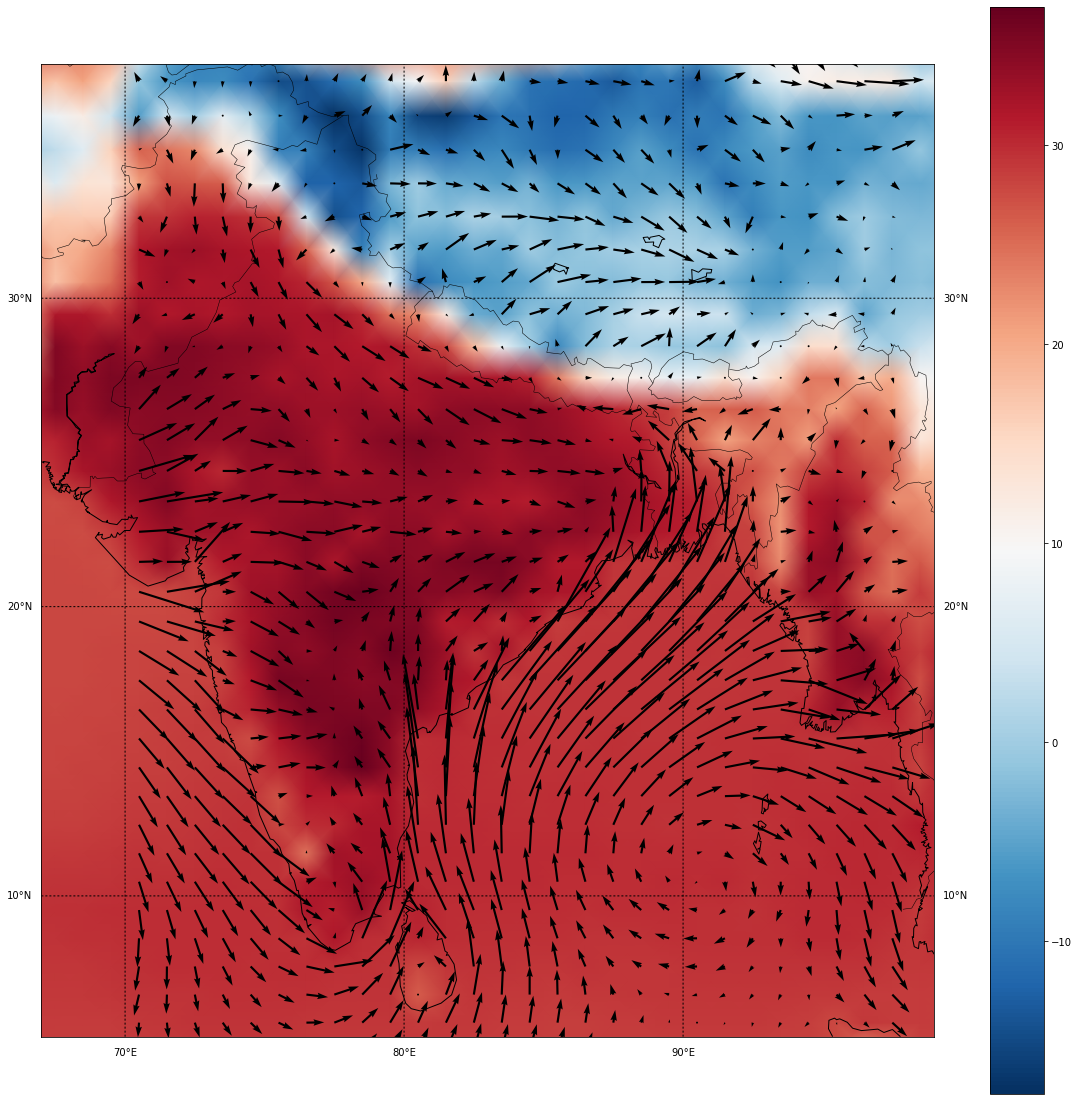

In [38]:
fig = plt.figure(num=None, figsize=(20, 20) )
m = Basemap(width=1200000,height=900000,projection='merc',resolution='l',
                    llcrnrlon=67,llcrnrlat=5,urcrnrlon=99,urcrnrlat=37,lat_0=28,lon_0=77)
m.drawcoastlines()
m.drawcountries()
#windspeed = (u_wind ** 2 + v_wind ** 2) ** 0.5
#u_wind = u_wind/windspeed
#v_wind = v_wind /windspeed
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,False,True],dashes=[2,2])
x,y = m(lon,lat)
cs = m.pcolormesh(x,y,t2,shading='gouraud',cmap=plt.cm.RdBu_r)#shading='gouraud',
#a = m.quiver(x,y,u_wind,v_wind,  color='black',linewidths = 5)
a = m.quiver(x,y,u_wind,v_wind,  color='black',scale=80)#, angle='x0y'
plt.colorbar()

In [ ]:
a = windspeed.max()
a

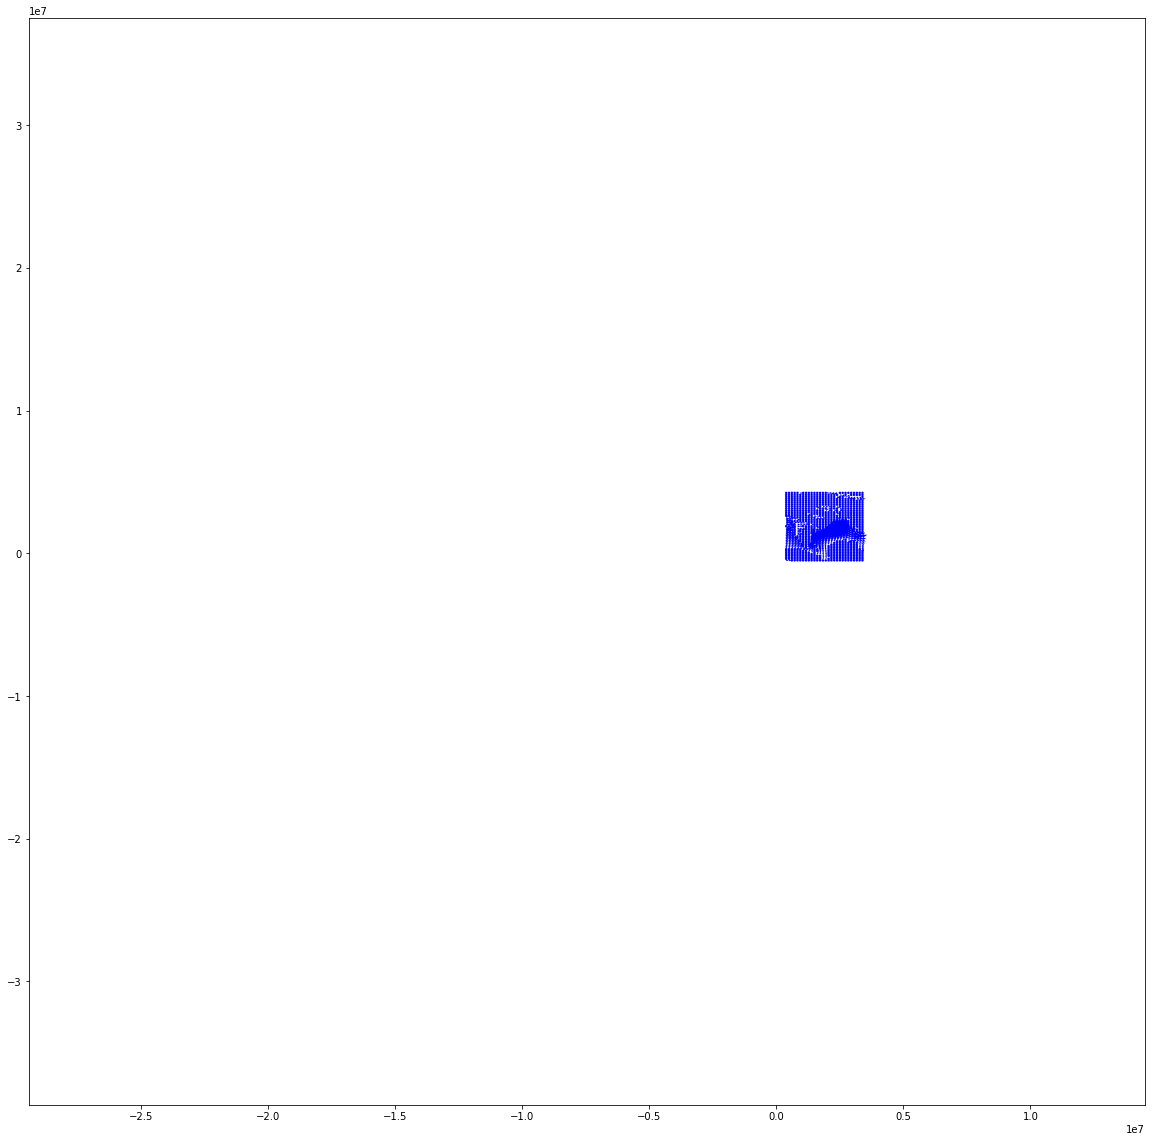

In [39]:
#plt.quiver(lon,lat, u_wind, v_wind, color='b', headlength=100)
fig = plt.figure(num=None, figsize=(20, 20) )

a = plt.quiver(x,y,u_wind[:],v_wind[:],  color='blue')

In [ ]:
fig = plt.figure(num=None, figsize=(20, 20) )

b = m.pcolormesh(x,y,np.squeeze(windspeed))


In [ ]:
c = wnd.variables['u']

In [ ]:
wnd.variables['time']